# **Lab 8 - Hierarchical and k-means clustering**

Clustering refers to the grouping of records, observations, or cases into classes of similar objects. A cluster is a collection of records that are similar to one another and dissimilar to records in other clusters.

Clustering differs from classification in that there is no target variable for clustering. The clustering task does not try to classify, estimate, or predict the value of a target variable.

Instead, clustering algorithms seek to segment the entire data set into relatively homogeneous subgroups or clusters, where the similarity of the records within the cluster is maximized, and the similarity to records outside this cluster is minimized.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/colab datasets/06. remaining_behavior_ext.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 34562 rows and 12 columns.


In [ ]:
missing_values = df[pd.isnull(df).any(axis=1)]

In [ ]:
missing_values

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
1117,1117,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,4.0,1.0,0.0,E
1360,1360,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,2.0,1.0,0.0,E
1776,1776,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,4.0,1.0,0.0,E
10718,10718,NaN,NaN,0.0,3,default,outlier,outlier,2.0,1.0,0.0,E
12348,12348,NaN,NaN,0.0,3,aws_datacenter,outlier,outlier,2.0,1.0,0.0,E


In [ ]:
mean_df = df.copy()

In [ ]:
mean_df = mean_df.fillna(mean_df.mean())

<ipython-input-7-8e1333fd3ee6>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_df = mean_df.fillna(mean_df.mean())


In [ ]:
mean_df[pd.isnull(mean_df).any(axis=1)]

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source


In [ ]:
#lebelencoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Converting categorical variable to numerical labels
le = LabelEncoder()
df['ip_type'] = le.fit_transform(df['ip_type'])
df['behavior'] = le.fit_transform(df['behavior'])
df['behavior_type'] = le.fit_transform(df['behavior_type'])
df['source'] = le.fit_transform(df['source'])


In [ ]:
df.drop(df.columns[0],axis=1,inplace=True)

In [ ]:
df

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,behavior,behavior_type,num_sessions,num_users,num_unique_apis,source
0,7.010387,0.419355,31.000000,13040,1,74,3,1.0,1.0,13.0,0
1,51.419393,0.252336,107.000000,330113,1,74,3,1.0,1.0,27.0,0
2,25.860775,0.275000,40.000000,62066,1,74,3,1.0,1.0,11.0,0
3,0.205909,0.818182,11.000000,136,1,74,3,1.0,1.0,9.0,0
4,0.122125,0.812500,16.000000,118,1,74,3,1.0,1.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...
34557,0.030952,0.016275,245.777778,4108,1,58,2,99.0,9.0,36.0,1
34558,2.300500,0.300000,30.000000,4141,1,74,3,5.0,1.0,9.0,1
34559,0.393229,0.044610,8.966667,6347,1,58,2,30.0,30.0,12.0,1
34560,0.394731,0.166667,108.000000,2558,1,74,3,4.0,1.0,18.0,1


# **Selecting Data for clustering analysis**

Here we are selecting data attributes for clustering analysis. For the sake of simplicity we are selecting only the following attributes:

* behavior
*  behavior_type

In [ ]:
X = df.iloc[:, [5, 6]].values#row indexing er jonno iloc use hoy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

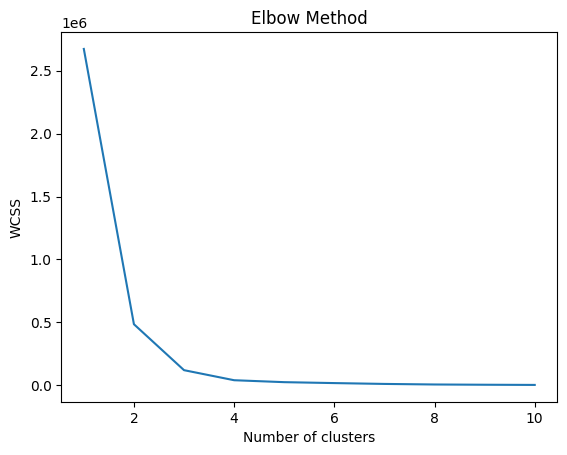

In [ ]:
from sklearn.cluster import KMeans
# (Within-Cluster Sum of Square)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Hierarchical Clustering Methods**

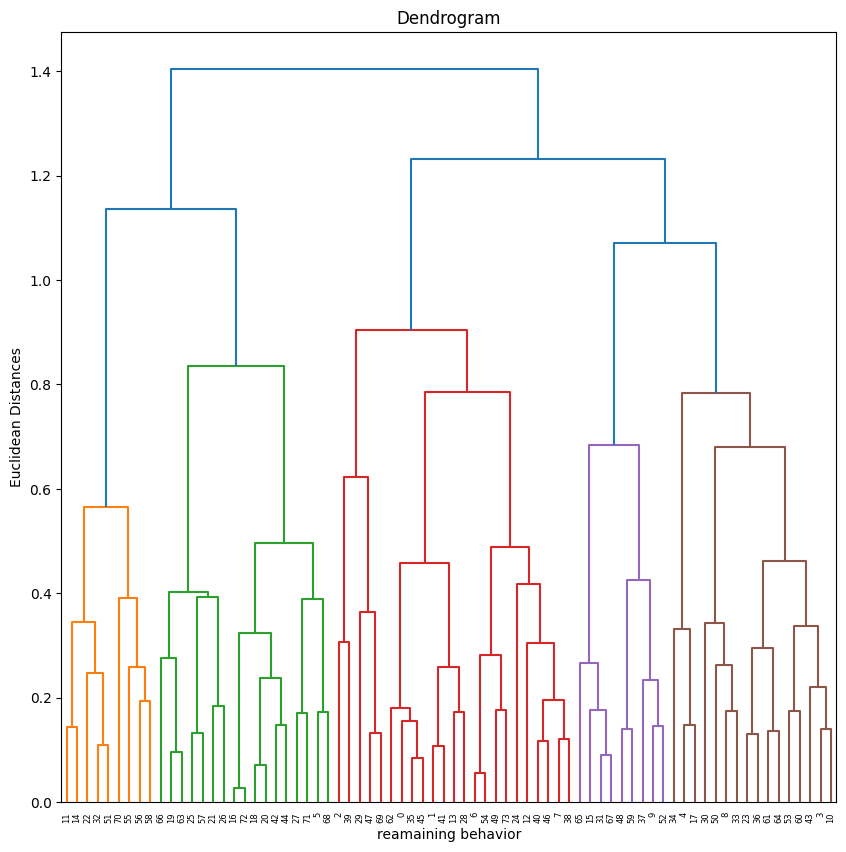

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Generate random data for demonstration purposes
np.random.seed(0)
X = np.random.rand(74, 3)  # Replace this with your actual dataset

plt.figure(figsize=(10, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))
plt.title('Dendrogram')
plt.xlabel('reamaining behavior')
plt.ylabel('Euclidean Distances')
plt.show()


# **Aggolomerative Clustering**

## **Single linkage**

Single linkage, sometimes termed the nearest-neighbor approach, is based on
the minimum distance between any record in cluster A and any record in cluster
B. In other words, cluster similarity is based on the similarity of the most
similar members from each cluster.
Single linkage tends to form long, slender clusters, which may sometimes lead
to heterogeneous records being clustered together.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')

y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


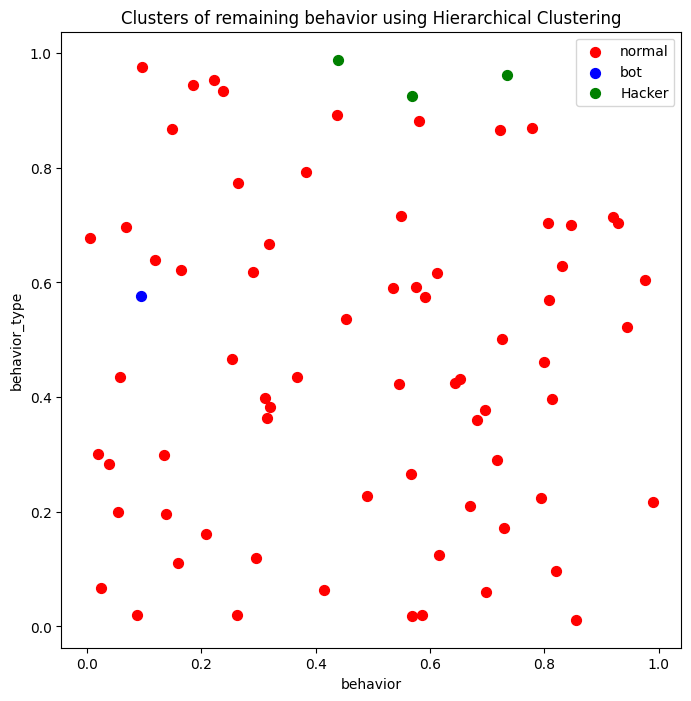

In [ ]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'normal')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'bot')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Hacker')

plt.title('Clusters of remaining behavior using Hierarchical Clustering')
plt.xlabel('behavior')
plt.ylabel('behavior_type')
plt.legend()
plt.show()

## **Complete linkage**

Complete linkage, sometimes termed the farthest-neighbor approach, is based
on the maximum distance between any record in cluster A and any record in
cluster B.In other words, cluster similarity is based on the similarity of the
most dissimilar members from each cluster.
Complete-linkage tends to form more compact, sphere-like clusters, with all
records in a cluster within a given diameter of all other records.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


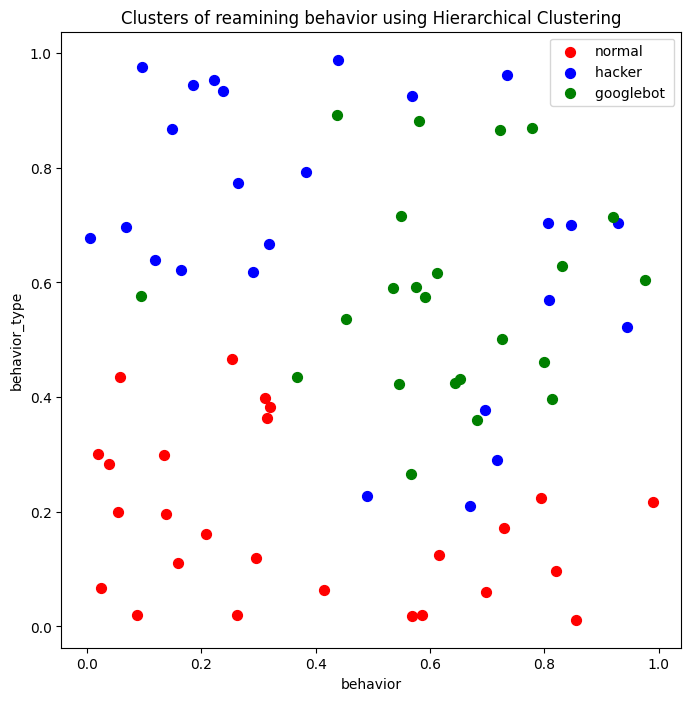

In [ ]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'normal')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'hacker ')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'googlebot ')

plt.title('Clusters of reamining behavior using Hierarchical Clustering')
plt.xlabel('behavior')
plt.ylabel('behavior_type')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


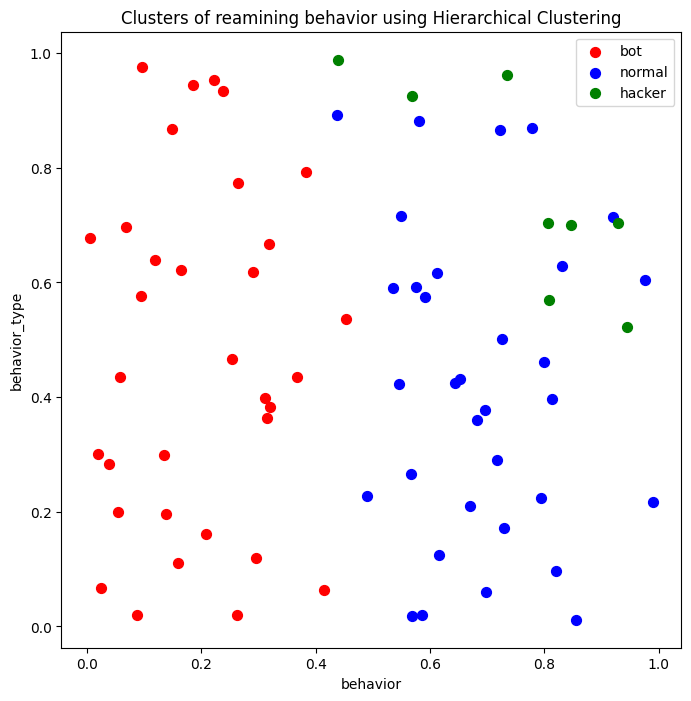

In [ ]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'bot')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'normal')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'hacker')

plt.title('Clusters of reamining behavior using Hierarchical Clustering')
plt.xlabel('behavior')
plt.ylabel('behavior_type')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


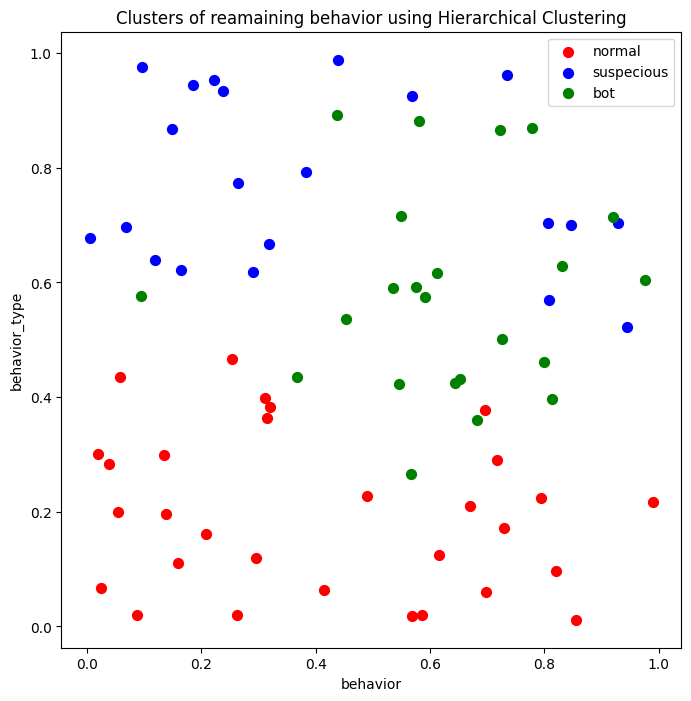

In [ ]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'normal')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'suspecious')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'bot')

plt.title('Clusters of reamaining behavior using Hierarchical Clustering')
plt.xlabel('behavior')
plt.ylabel('behavior_type')
plt.legend()
plt.show()

# **k-means Clustering**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


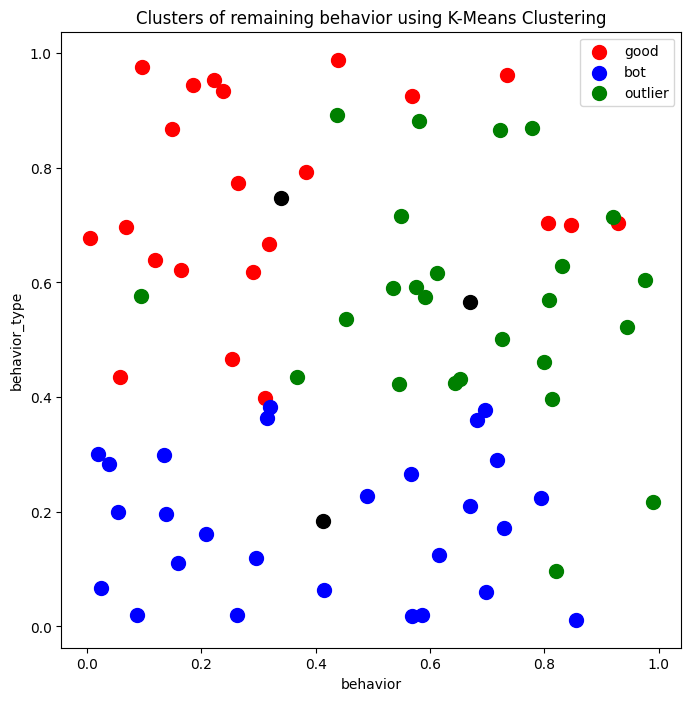

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'good')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'bot')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'outlier')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless Customers')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Luxury Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black')
plt.title('Clusters of remaining behavior using K-Means Clustering')
plt.xlabel('behavior')
plt.ylabel('behavior_type')
plt.legend()
plt.show()